# 2. 최대 가능도 추정 (Maximum Likelihood Estimation; MLE)

- 다양한 분포에 대하여 정규 분포로 적합시키는 방법
- 이를, `최대 가능도 추정` 이라고 함

## 2.1. 생성 모델의 개요
- 생성 모델의 목표는 무엇일까 ?
- 생성 모델는 목표를 달성하기 위해 어떻게 학습해야 할까 ?

### 2.1.1. 생성 모델의 목표

- 특정 데이터 $x$ 의 확률 분포 $p(x)$ 를 모델링 (즉, 수식으로 정의) 한 후, 모델링된 집단에서 선택된 것 같은 유사 데이터 $\tilde{x}$를 새롭게 생성하는 것
- 즉, `실제 데이터와 구분하기 어려운 데이터를 새롭게 생성하는 모델`을 만드는 것이 목표
- (예시) 어떤 집단의 키의 확률 분포를 정규 분포로 표현한 생성 모델
  - 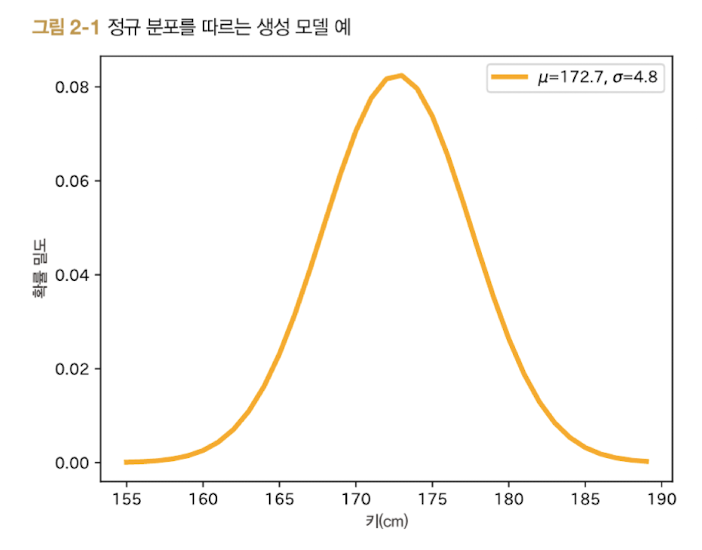
  
  > 이게 왜 생성 모델인가 ?
    - 생성 모델을 구축하기 위해서는 모델링이 필요
      - $\mu=172.7$ 그리고 $\sigma=4.8$ 을 매개변수로 갖는 정규 분포로 해당 집단의 키에 대한 확률 분포를 모델링함
      - $\mathcal{N}(\mu=172.7, \sigma=4.8)$

In [1]:
import numpy as np

def normal(x, mu=0, sigma=1):
    """
    정규 분포(가우시안 분포, Gaussian Distribution)의 확률 밀도 함수 (PDF)를 계산하는 함수.

    입력:
    x     : 확률 변수 (값)
    mu    : 평균 (default = 0)
    sigma : 표준편차 (default = 1)

    출력:
    y     : 정규 분포의 확률 밀도 함수 값
    """

    # 아주 작은 값을 추가하여 sigma가 0이 되는 것을 방지할 수 있음 (주석 처리된 코드)
    sigma += 1e-8 

    # 정규 분포 확률 밀도 함수 (PDF) 공식:
    # f(x) = (1 / (sqrt(2π) * σ)) * exp(-(x - μ)^2 / (2 * σ^2))
    y = 1.0 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))

    return y


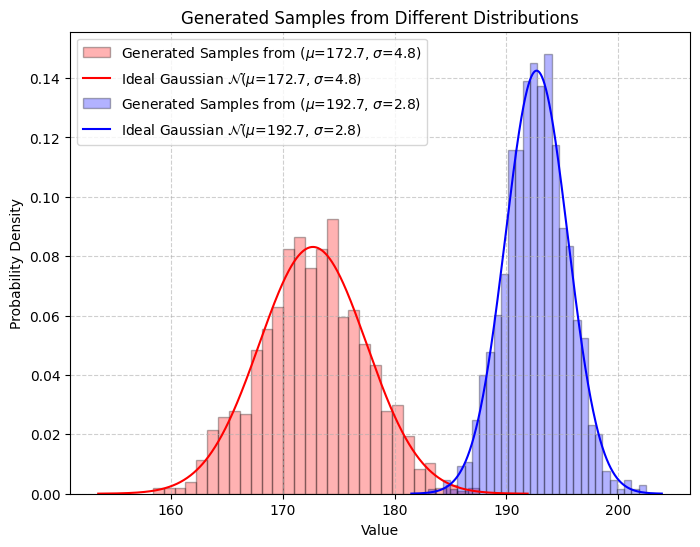

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 설정값
n_samples = 1000  # 샘플 수

mu = 172.7     # 첫 번째 정규분포의 평균
sigma = 4.8    # 첫 번째 정규분포의 표준편차

mu2 = 192.7    # 두 번째 정규분포의 평균
sigma2 = 2.8   # 두 번째 정규분포의 표준편차

# x축 값 생성: 평균(mu) 기준으로 ±4σ 범위에서 균일한 간격으로 n_samples개의 점을 생성
x = np.linspace(mu - 4*sigma, mu + 4*sigma, n_samples)
x2 = np.linspace(mu2 - 4*sigma2, mu2 + 4*sigma2, n_samples)

# 1. Gaussian distribution에서 샘플 생성
gaussian_samples = mu + sigma * np.random.randn(n_samples)  # N(mu, sigma)에서 난수 샘플링
gaussian_samples2 = mu2 + sigma2 * np.random.randn(n_samples)  # N(mu2, sigma2)에서 난수 샘플링

# 정규 분포 함수 정의 (정규분포 PDF)
def normal(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# 이상적인 정규 분포 생성 (이론적인 PDF 곡선)
gaussian_distribution = normal(x, mu, sigma)
gaussian_distribution2 = normal(x2, mu2, sigma2)

# 결과 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 설정

# 첫 번째 정규분포 시각화
plt.hist(gaussian_samples, bins=30, density=True, edgecolor='k', alpha=0.3, color='r',
         label=f"Generated Samples from ($\\mu$={mu}, $\\sigma$={sigma})")  # 히스토그램 (샘플 데이터)
plt.plot(x, gaussian_distribution, 'r-', 
         label="Ideal Gaussian $\\mathcal{N}$" + f"($\\mu$={mu}, $\\sigma$={sigma})")  # 이론적 정규분포

# 두 번째 정규분포 시각화
plt.hist(gaussian_samples2, bins=30, density=True, edgecolor='k', alpha=0.3, color='b',
         label=f"Generated Samples from ($\\mu$={mu2}, $\\sigma$={sigma2})")  # 히스토그램 (샘플 데이터)
plt.plot(x2, gaussian_distribution2, 'b-', 
         label="Ideal Gaussian $\\mathcal{N}$" + f"($\\mu$={mu2}, $\\sigma$={sigma2})")  # 이론적 정규분포

# 그래프 설정
plt.legend()  # 범례 추가
plt.title("Generated Samples from Different Distributions")  # 그래프 제목
plt.xlabel("Value")  # x축 라벨
plt.ylabel("Probability Density")  # y축 라벨
plt.grid(True, linestyle="--", alpha=0.6)  # 격자 추가 (가독성 향상)

plt.show()  # 그래프 출력


> $\mathcal{N}(\mu=192.7, \sigma=2.8)$ (파란색 그래프) 에서 뽑힌 샘플은 $\mathcal{N}(\mu=172.7, \sigma=4.8)$ (빨간색 그래프) 에 뽑힌 샘플과 구분이 가능한가 ?
- 구분이 가능하다.
- 즉, $\mathcal{N}(\mu=192.7, \sigma=2.8)$ (파란색 그래프) 에서 뽑힌 샘플은 $\mathcal{N}(\mu=172.7, \sigma=4.8)$ (빨간색 그래프) 에서 생성된 데이터가 아니다.

> 어떻게 해야 우리가 원하는 데이터 분포를 반영할 수 있는 적절한 매개변수를 설정할 수 있을까 ?

> 즉, 어떻게 매개변수를 추정 (Parameter estimation) 할 수 있을까 ?

### 2.1.2. 모집단과 샘플
- `추정한다 (estimate)` 는 것이 무엇일까 ?
  - 이를 이해하기 위해선, 모집단 (population) 에 대하여 살펴보는 것이 필요


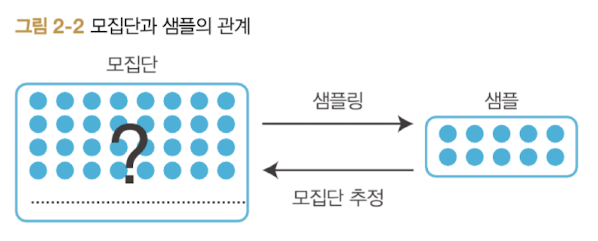

- `모집단 (population)` 이란 ?
  - 대상의 전체 집합
  - 일반적으로 모집단의 규모는 방대함
    - 즉, 빅데이터 (big data) 를 의미함

- `샘플 (sample)` 이란 ?
  - 모집단에서 추출된  제한된 수의 임의의 데이터 집합

- `추정 (estimate)` 이란 ?
  - 여론 조사에서 이야기하듯, 제한된 수의 샘플만을 활용하여 모집단의 특성 (분포) 를 예측하는 것
  - 이렇게 예측된 모집단의 분포를 `모집단 분포 (population distribution)` 이라 함
  - 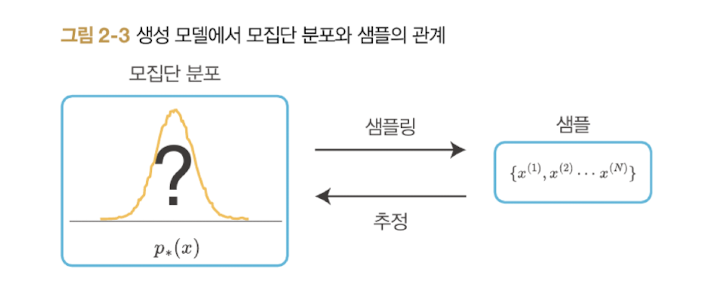

- 모집단 분포인 $p_*(x)$ 를 사전에 알 수 있는 것은 이상적인 환경
  - 현실적으로 $p_*(x)$ 를 직접 알 수 없음
- 따라서, `샘플을 바탕으로 모집단 분포를 추정하는 것`이 일반적인 방식
  - 모집단 분포의 매개변수 추정을 위한 아래와 같은 작업을 수행
    1. 모델링: 모집단 분포를 '매개변수로 조정 가능한 확률 분포'로 표현할 수 있다고 가정
        > 모델링을 통한 매개변수 기반 제어가 가능한 확률 분포 모델 설정
    2. 매개변수 추정: 모델링 결과로 만들어진 확률 분포가 샘플 데이터에 부합하도록 매개변수를 추정
        > 수집된 데이터 샘플과 가장 부합하는 매개변수 조정
    

## 2.2. 실제 데이터로 생성 모델 구현

### 2.2.1. 키 데이터셋 불러오기
- 키 데이터셋을 활용한 생성 모델
  - (데이터) 
    - SOCR 데이터
  - (설명)
    - 1993년 당시 18세인 홍콩인들의 키 데이터 2만 5천건


(25000,)


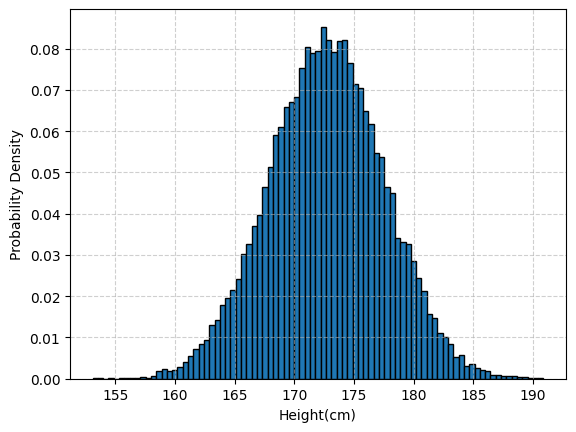

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

# 현재 파일이 있는 디렉토리에서 'height.txt' 파일 경로를 생성
path = os.path.join('./height.txt')

# height.txt 파일에서 데이터를 불러와 배열로 저장
xs = np.loadtxt(path)

# 데이터의 크기(샘플 개수)를 출력
print(xs.shape)

# 히스토그램을 그려 데이터의 분포를 시각화
plt.hist(xs, bins='auto', density=True, edgecolor='k')  # 자동으로 최적의 bin 개수를 설정하여 정규화된 히스토그램을 그림
plt.xlabel('Height(cm)')  # x축 라벨: 키 (cm)
plt.ylabel('Probability Density')  # y축 라벨: 확률 밀도
plt.grid(True, linestyle="--", alpha=0.6)  # 격자 추가 (가독성 향상)
plt.show()  # 그래프 출력


### 2.2.2. 정규 분포를 따르는 생성 모델

- 모집단 분포의 매개변수 추정을 위한 아래와 같은 작업을 수행
  1. `모델링`: 키 데이터가 정규 분포라고 가정
        > 모델링을 통한 매개변수 기반 제어가 가능한 확률 분포 모델 설정
  2. `매개변수 추정`: 샘플을 기반으로 정규 분포의 매개변수를 추정
        > 수집된 데이터 샘플과 가장 부합하는 매개변수 조정

1. 모델링: 키 데이터가 정규 분포라고 가정
   - $\mathcal{N}(\mu, \sigma)$
  
2. 매개변수 추정: 샘플을 기반으로 정규 분포의 매개변수를 추정
    - 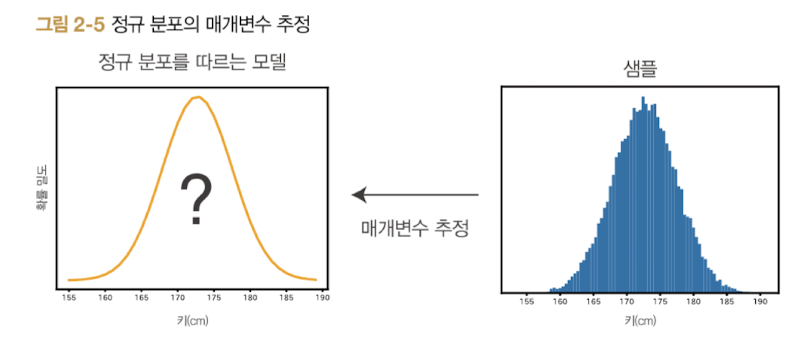
    
- 매개변수를 추정하는 방법
  - 최대 가능도 추정 (MLE)
  - **(결론부터) 정규 분포의 매개변수 추정은?**
    - $\hat{\mu}$: 샘플의 평균
      - $\hat{\mu}=\frac{1}{N}\sum_{n=1}^{N}~x^{(n)}$
    - $\hat{\sigma}$: 샘플의 표준편차
      - $\hat{\sigma}=\sqrt{\frac{1}{N}\sum_{n=1}^{N}~(x^{(n)} - \hat{\mu})^2}$
    > 최대 가능도 추정 (MLE) 를 이용해 정규 분포의 매개변수를 추정하면 `샘플의 평균과 표준편차를 구하는 것과 동치인 이유`


In [4]:

# 정규 분포(가우시안 분포)의 확률 밀도 함수 (PDF) 정의
def normal(x, mu=0, sigma=1):
    """
    정규 분포 확률 밀도 함수(PDF)를 계산하는 함수.
    
    입력:
    - x: 확률 변수
    - mu: 평균
    - sigma: 표준편차
    
    출력:
    - y: 정규 분포 PDF 값
    """
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return y


(25000,)


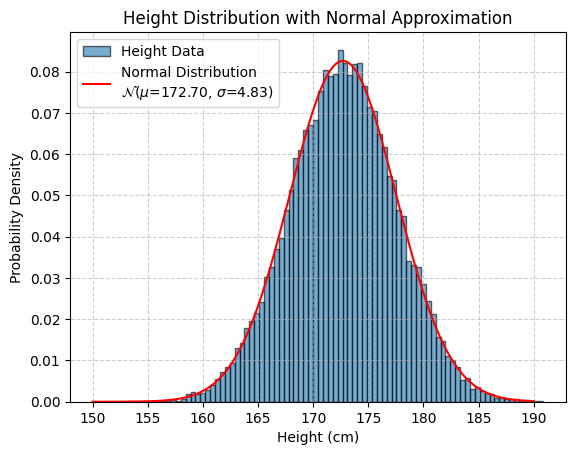

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

# 현재 디렉토리에 있는 'height.txt' 파일 경로를 생성
path = os.path.join('./height.txt')

# height.txt 파일에서 데이터를 불러와 배열로 저장
xs = np.loadtxt(path)

# 데이터의 크기(샘플 개수)를 출력
print(xs.shape)  # (예: 1000,) 형태로 출력됨

#####################################################################
#                           매개변수 추정                           #
#####################################################################
# 데이터의 평균(mu) 및 표준편차(sigma) 계산
mu = np.mean(xs)  # 평균 계산
sigma = np.std(xs)  # 표준편차 계산

# x축 값 생성: 키 범위를 150cm ~ 190cm로 설정하여 1000개의 값 생성
x = np.linspace(150, 190, 1000)

# 정규 분포 PDF 값 계산 (이론적인 분포)
y = normal(x, mu, sigma)

#####################################################################
#                             결과 시각화                           #
#####################################################################
# 히스토그램 및 정규 분포 그래프 시각화
plt.hist(xs, bins='auto', density=True, edgecolor='k', alpha=0.6, label="Height Data")  
# 히스토그램을 자동 bin 개수로 설정하고 정규화하여 확률 밀도 형태로 출력

plt.plot(x, y, 'r-', label="Normal Distribution\n$\\mathcal{N}$" +  f"($\\mu$={mu:.2f}, $\\sigma$={sigma:.2f})")  # 정규 분포 PDF 곡선 추가

# 그래프 설정
plt.xlabel('Height (cm)')  # x축 라벨: 키(cm)
plt.ylabel('Probability Density')  # y축 라벨: 확률 밀도
plt.grid(True, linestyle="--", alpha=0.6)  # 격자 추가 (가독성 향상)
plt.legend()  # 범례 추가
plt.title("Height Distribution with Normal Approximation")  # 그래프 제목

plt.show()  # 그래프 출력


## 2.3. 최대 가능도 추정 (MLE) 이론
- $N$ 개의 관측 데이터 $\{ x^{(1)}, x^{(2)}, \cdots, x^{(N)} \}$ 이 있을 때, 정규 분포의 매개 변수를 추정해보자
    - $\hat{\mu}$: 샘플의 평균
      - $\hat{\mu}=\frac{1}{N}\sum_{n=1}^{N}~x^{(n)}$
    - $\hat{\sigma}$: 샘플의 표준편차
      - $\hat{\sigma}=\sqrt{\frac{1}{N}\sum_{n=1}^{N}~(x^{(n)} - \hat{\mu})^2}$

### 2.3.1. 가능도 최대화

- 매개변수 $\theta$ 를 갖는 확률 분포가 있다고 가정하자
  - 이때, 매개변수 $\theta$ 를 갖는 확률 밀도 함수는 $p(x; \theta)$ 로 표현할 수 있음
  - 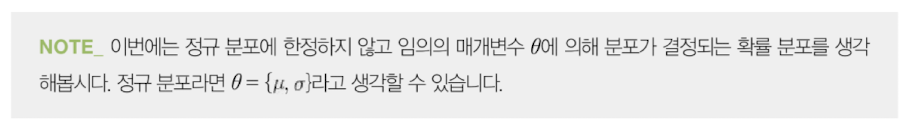
  
- 모집합 (population) 으로 부터 선택된 제한된 갯수 $N$ 의 샘플 $\mathcal{D} = \{ x^{(1)}, x^{(2)}, \cdots, x^{(N)} \}$ 을 가지고 있다고 가정
- 샘플 $\mathcal{D}$ 에 포함된 각 샘플 $x^{(n)}$ 의 확률 밀도는 $p(x^{(n)}; \theta)$ 를 따음
  - 특히, 데이터 $x$ 는 `독립적으로 생성`
- 이때, 샘플 $\mathcal{D}$ 를 얻을 수 있는 확률 밀도$p(\mathcal{D}; \theta)$는 아래와 같이 표현:
  - $p(\mathcal{D}; \theta)=p(x^{(1)};\theta)p(x^{(2)};\theta) \cdots p(x^{(N)};\theta)=\prod_{n=1}^{N}p(x^{(n)}; \theta)$

- `가능도(likelihood)` 또는 `가능도 함수(likelihood function)` 이란?
  - 매개변수 $\theta$ 를 인수로 받는 함수 $L(\theta)$
  - 어떤 매개변수 $\theta$ 에 대해 샘플 $\mathcal{D}$ 일어날 가능성을 확률 밀도 $p(\mathcal{D}; \theta)$로 표현 
    - $L(\theta) = p(\mathcal{D}; \theta)$

- `최대 가능도 추정 (maximum likielihood estimation; MLE)` 란 ?
  - 가능도 $L(\theta)$ 또는 $p(\mathcal{D}; \theta)$ 를 최대화 하는 매개변수 $\theta$ 를 찾는 기법
  - (예시)
    - 가능도를 최대화하는 매개변수를 $\hat\theta$ 라는 의미는
      - 매개 변수가 $\hat \theta$ 일 때 샘플 $\mathcal{D}$ 이 관측될 확률이 가장 높다는 의미

- `가능도 (likelihood)` 와 `로그 가능도 (log likelihood)` 와의 관계 ?
  - 가능도 (likelihood)
    - $p(\mathcal{D}; \theta)=p(x^{(1)};\theta)p(x^{(2)};\theta) \cdots p(x^{(N)};\theta)=\prod_{n=1}^{N}p(x^{(n)}; \theta)$
  - 로그 가능도 (log likelihood)
    - $\log ~ p(\mathcal{D}; \theta)=\log ~ p(x^{(1)};\theta)p(x^{(2)};\theta) \cdots p(x^{(N)};\theta) =\log ~ p(x^{(1)};\theta) + \log ~ p(x^{(2)};\theta) + \cdots + \log ~ p(x^{(N)};\theta)=\sum_{n=1}^{N} \log ~ p(x^{(n)}; \theta)$
    - 가능도 함수에 로그를 취하는 경우 `계산이 편리한 경우가 많음`
    - 계산이 편하다고 하며 로그를 적용해도 되는가 ?
      - 로그 함수 (logarithm function) 는 단조 증가 함수 (monotonic increase function) 이기 때문에 `함수의 경향성이 달라지지 않음`
      - 즉, 가능도 함수 $p(\mathcal{D}; \theta)$ 의 최대화를 만족하는 매개변수 $\hat \theta$ 와 로그 가능도 함수 $\log ~ p(\mathcal{D}; \theta)$ 의 최대화를 만족하는 매개변수 $\hat \theta$ 는 동일
    - 로그 함수 (logirithm function) 의 성질
      - 곱의 로그 = 로그들의 합
      - 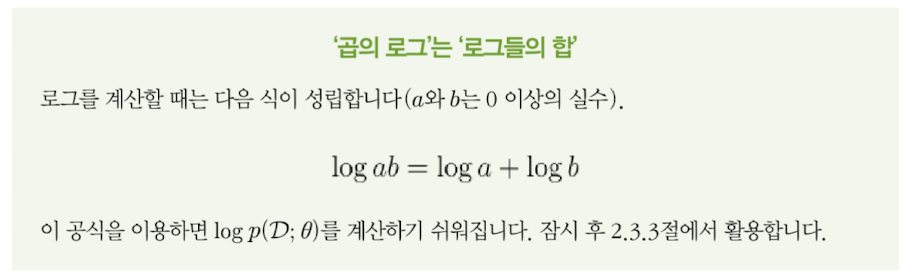

### 2.3.2. 미분을 사용하여 최댓값 찾기

- $y$ 를 최대화하는 $x$ 를 구하시오.
  - $y = -2x^2 + 3x + 4$

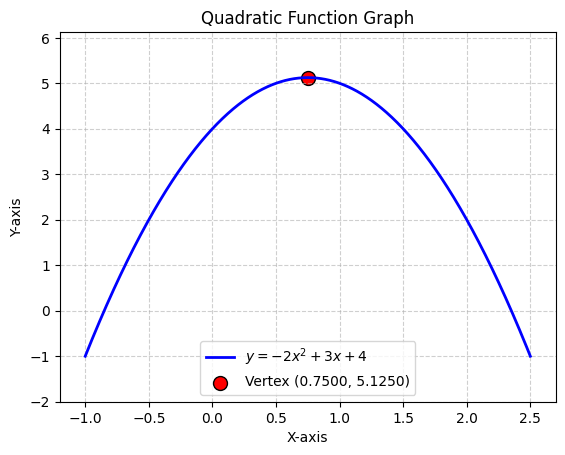

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# x 값 생성 (-1.0 ~ 2.5 범위에서 1000개의 값)
x = np.linspace(-1.0, 2.5, 1000)

# 2차 함수 계산
y = -2*x**2 + 3*x + 4 

# 그래프 설정
# plt.figure(figsize=(8, 5))  # 그래프 크기 조정
plt.plot(x, y, color='b', linestyle='-', linewidth=2, label="$y = -2x^2 + 3x + 4$")  # 함수 그래프

# 꼭지점 찾기 (최대 또는 최소점)
x_vertex = -3 / (-4)  # 꼭지점 x 좌표 (x = -b / 2a)
y_vertex = -2*x_vertex**2 + 3*x_vertex + 4  # 꼭지점 y 좌표

# 꼭지점 강조 (최고점)
plt.scatter(x_vertex, y_vertex, color='red', s=100, edgecolors='black', label=f"Vertex ({x_vertex:.4f}, {y_vertex:.4f})")  

# 축 라벨 및 제목 추가
plt.xlabel("X-axis")  
plt.ylabel("Y-axis")  
plt.title("Quadratic Function Graph")  

# 축 범위 조정
plt.xlim(-1.2, 2.7)  
plt.ylim(min(y) - 1, max(y) + 1)  

# 눈금 추가
plt.grid(True, linestyle="--", alpha=0.6)  

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()


- $y$ 의 $x$ 에 대한 미분 $\frac{dy}{dx}$
  - $\frac{dy}{dx}=-4x + 3$

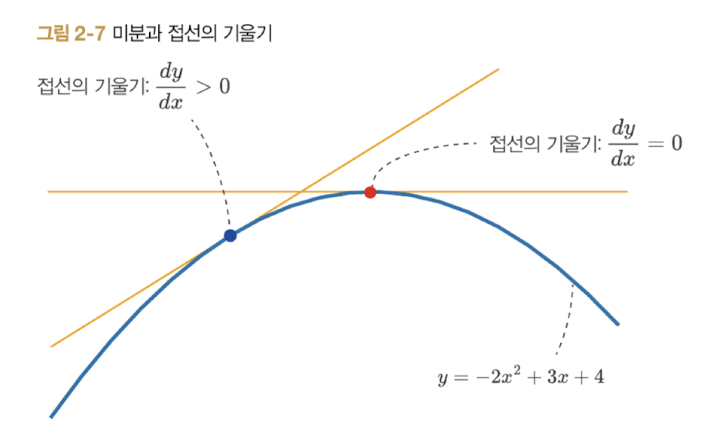

- 미분이 0 인 곳에서 최대값 / 최솟값이 존재
  - $\frac{dy}{dx}=-4x + 3 = 0$
  - $\therefore x = \frac{3}{4}$
    - 해석적 해 (analytic solution) 을 구할 수 있다 / 해석적으로 풀 수 있다
    - 닫힌 해 (closed form solution) 이 존재한다 / 닫힌 해를 구할 수 있다


> 로그 가능도 (log likelihood) 함수의 매개변수 $\theta$ 에 대한 해를 구하시오.

### 2.3.3. 정규 분포의 최대 가능도 추정

- 모집단 분포의 매개변수 추정을 위한 아래와 같은 작업을 수행
  1. `모델링`: 키 데이터가 정규 분포라고 가정
        > 모델링을 통한 매개변수 기반 제어가 가능한 확률 분포 모델 설정
  2. `매개변수 추정`: 샘플을 기반으로 정규 분포의 매개변수를 추정
        > 수집된 데이터 샘플과 가장 부합하는 매개변수 조정

1. 모델링
   - 주어진 샘플 $\mathcal{D}$ 에 대하여 정규 분포로 `모델링`
     - $\mathcal{N}(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp \left( -\frac{(x - \mu)^2}{2\sigma^2} \right)$
   - $N$개의 관측 데이터로 구성된 샘플 $\mathcal{D}=\{ x^{(1)}, x^{(2)}, \cdots, x^{(N)} \}$ 에 대한 `가능도 함수 (확률 밀도 함수)`
     - $\mathcal{N}(\mathcal{D}; \mu, \sigma) = p(\mathcal{D}; \mu, \sigma) = p(\mathcal{D}; \theta) = L(\theta)$
     - $p(\mathcal{D}; \mu, \sigma)= \prod_{n=1}^N \mathcal{N}(x^{(n)}; \mu, \sigma) = \prod_{n=1}^N\frac{1}{\sqrt{2\pi\sigma^2}}\exp \left( -\frac{(x^{(n)} - \mu)^2}{2\sigma^2} \right)$
   - $N$개의 관측 데이터로 구성된 샘플 $\mathcal{D}=\{ x^{(1)}, x^{(2)}, \cdots, x^{(N)} \}$ 에 대한 `로그 가능도 함수`
     - $\log ~ p(\mathcal{D}; \mu, \sigma) = \log ~ L(\theta)$
     
         $ = \log \prod_{n=1}^N\frac{1}{\sqrt{2\pi\sigma^2}}\exp \left( -\frac{(x^{(n)} - \mu)^2}{2\sigma^2} \right)$
     
         $ = \log \prod_{n=1}^N\frac{1}{\sqrt{2\pi\sigma^2}} + \log \prod_{n=1}^{N} \exp \left( -\frac{(x^{(n)} - \mu)^2}{2\sigma^2} \right)$

         $ = \log \left( \frac{1}{\sqrt{2\pi\sigma^2}} \right)^N + \sum_{n=1}^{N} \left( -\frac{(x^{(n)} - \mu)^2}{2\sigma^2} \right)$

         $ = - \frac{N}{2} \log ~ {2\pi\sigma^2} - \frac{1}{2\sigma^2} \sum_{n=1}^{N}  (x^{(n)} - \mu)^2$
2. 최대 가능도 추정 (MLE)
    
    ![image.png](attachment:image.png)

    1. 정규 분포의 매개변수 중 평균 $\mu$ 에 대한 추정
       - $\frac{\partial L}{\partial \mu} = \frac{\partial}{\partial \mu} \log ~ p(\mathcal{D}; \mu, \sigma)$
       - $\frac{\partial L}{\partial \mu} = \frac{\partial}{\partial \mu} \left( - \frac{N}{2} \log {2\pi\sigma^2} - \frac{1}{2\sigma^2} \sum_{n=1}^{N}  (x^{(n)} - \mu)^2 \right)$
       
            $= \frac{1}{\sigma^2} \sum_{n=1}^{N} ( x^{(n)} - \mu )$

        - $L(\theta)$ 의 최댓값은 $\frac{\partial L}{\partial \mu} = 0$ 지점에서 추정 가능
          - $\frac{\partial L}{\partial \mu} = \frac{1}{\sigma^2} \sum_{n=1}^{N} ( x^{(n)} - \mu ) = 0$
          - ![image-2.png](attachment:image-2.png)

    2. 정규 분포의 매개변수 중 표준편차 $\sigma$ 에 대한 추정
    - 이때, $\mu = \hat \mu$ 라고 가정하자
    - $\frac{\partial L}{\partial \sigma} = \frac{\partial}{\partial \sigma} \log ~ p(\mathcal{D}; \mu = \hat \mu, \sigma)$
    - $\frac{\partial L}{\partial \sigma} = - \frac{N}{2} \frac{d}{d \sigma} \left( \log {2\pi}\sigma^2 \right) - \frac{\partial}{\partial \sigma} \left( \frac{1}{2\sigma^2} \sum_{n=1}^{N}  (x^{(n)} - \hat \mu)^2 \right)$
        - 1번째 항에 대한 표준편차 $\sigma$ 에 대한 편미분
          - $\frac{d}{d \sigma} \left( \log {2\pi}\sigma^2 \right)$
            
            $ = \frac{d}{d\sigma} (\log 2\pi) + \frac{d}{d\sigma} (\log \sigma^2)$

            $ = 0 + \frac{d}{d\sigma} ( 2 \log \sigma)$

            $ = \frac{2}{\sigma}$
          
        - 2번째 항에 대한 표준편차 $\sigma$ 에 대한 편미분
          - $\frac{\partial}{\partial \sigma} \left( \frac{1}{2\sigma^2} \sum_{n=1}^{N}  (x^{(n)} - \hat \mu)^2 \right)$
            
            $ = \frac{\partial}{\partial \sigma} \left( \frac{\sigma^{-2}}{2} \sum_{n=1}^{N}  (x^{(n)} - \hat \mu)^2 \right)$

            $ = \left( \frac{-2\sigma^{-3}}{2} \sum_{n=1}^{N}  (x^{(n)} - \hat \mu)^2 \right)$

            $ = -\sigma^{-3} \sum_{n=1}^{N}  (x^{(n)} - \hat \mu)^2$

    - $L(\theta)$ 의 최댓값은 $\frac{\partial L}{\partial \sigma} = 0$ 지점에서 추정 가능
        - $\frac{\partial L}{\partial \sigma} = - \frac{N}{2} \frac{2}{\sigma} + \sigma^{-3} \sum_{n=1}^{N}  (x^{(n)} - \hat \mu)^2 = 0$
        - ![image-3.png](attachment:image-3.png)

2. 최대 가능도 추정 (MLE)
    
    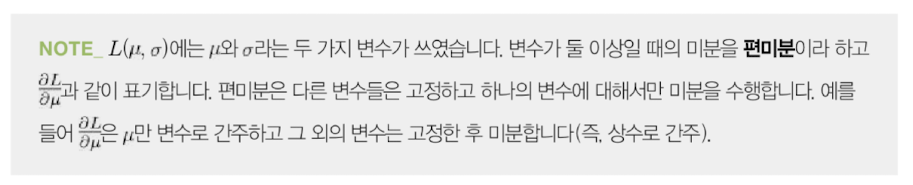

    1. 정규 분포의 매개변수 중 평균 $\mu$ 에 대한 추정
       - $\frac{\partial L}{\partial \mu} = \frac{\partial}{\partial \mu} \log ~ p(\mathcal{D}; \mu, \sigma)$
       - $\frac{\partial L}{\partial \mu} = \frac{\partial}{\partial \mu} \left( - \frac{N}{2} \log {2\pi\sigma^2} - \frac{1}{2\sigma^2} \sum_{n=1}^{N}  (x^{(n)} - \mu)^2 \right)$
       
            $= \frac{1}{\sigma^2} \sum_{n=1}^{N} ( x^{(n)} - \mu )$

        - $L(\theta)$ 의 최댓값은 $\frac{\partial L}{\partial \mu} = 0$ 지점에서 추정 가능
          - $\frac{\partial L}{\partial \mu} = \frac{1}{\sigma^2} \sum_{n=1}^{N} ( x^{(n)} - \mu ) = 0$
          - 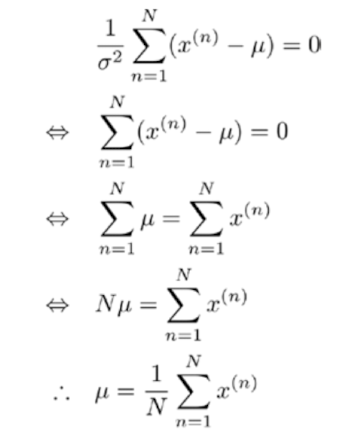

    2. 정규 분포의 매개변수 중 표준편차 $\sigma$ 에 대한 추정
    - 이때, $\mu = \hat \mu$ 라고 가정하자
    - $\frac{\partial L}{\partial \sigma} = \frac{\partial}{\partial \sigma} \log ~ p(\mathcal{D}; \mu = \hat \mu, \sigma)$
    - $\frac{\partial L}{\partial \sigma} = - \frac{N}{2} \frac{d}{d \sigma} \left( \log {2\pi}\sigma^2 \right) - \frac{\partial}{\partial \sigma} \left( \frac{1}{2\sigma^2} \sum_{n=1}^{N}  (x^{(n)} - \hat \mu)^2 \right)$
        - 1번째 항에 대한 표준편차 $\sigma$ 에 대한 편미분
          - $\frac{d}{d \sigma} \left( \log {2\pi}\sigma^2 \right)$
            
            $ = \frac{d}{d\sigma} (\log 2\pi) + \frac{d}{d\sigma} (\log \sigma^2)$

            $ = 0 + \frac{d}{d\sigma} ( 2 \log \sigma)$

            $ = \frac{2}{\sigma}$
          
        - 2번째 항에 대한 표준편차 $\sigma$ 에 대한 편미분
          - $\frac{\partial}{\partial \sigma} \left( \frac{1}{2\sigma^2} \sum_{n=1}^{N}  (x^{(n)} - \hat \mu)^2 \right)$
            
            $ = \frac{\partial}{\partial \sigma} \left( \frac{\sigma^{-2}}{2} \sum_{n=1}^{N}  (x^{(n)} - \hat \mu)^2 \right)$

            $ = \left( \frac{-2\sigma^{-3}}{2} \sum_{n=1}^{N}  (x^{(n)} - \hat \mu)^2 \right)$

            $ = -\sigma^{-3} \sum_{n=1}^{N}  (x^{(n)} - \hat \mu)^2$

    - $L(\theta)$ 의 최댓값은 $\frac{\partial L}{\partial \sigma} = 0$ 지점에서 추정 가능
        - $\frac{\partial L}{\partial \sigma} = - \frac{N}{2} \frac{2}{\sigma} + \sigma^{-3} \sum_{n=1}^{N}  (x^{(n)} - \hat \mu)^2 = 0$
        - 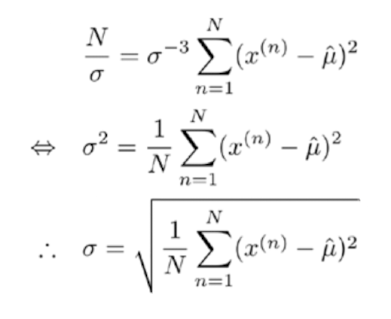

- 최대 가능도 추정 (MLE) 를 통해 구한 정규분포의 매개변수 $\theta$ 의 해는 
    - $\hat \mu$ 는 샘플의 평균
    - $\hat \sigma$ 는 샘플의 표준 편차
    - 임을 확인함

## 2.4. 생성 모델의 용도

- 생성 모델을 구현하기 위하여 아래와 같은 작업을 수행
  1. `모델링`: 키 데이터가 정규 분포라고 가정
        > 모델링을 통한 매개변수 기반 제어가 가능한 확률 분포 모델 설정
  2. `매개변수 추정`: 샘플을 기반으로 정규 분포의 매개변수를 추정
        > 수집된 데이터 샘플과 가장 부합하는 매개변수 조정

In [7]:

# 정규 분포(가우시안 분포)의 확률 밀도 함수 (PDF) 정의
def normal(x, mu=0, sigma=1):
    """
    정규 분포 확률 밀도 함수(PDF)를 계산하는 함수.
    
    입력:
    - x: 확률 변수
    - mu: 평균
    - sigma: 표준편차
    
    출력:
    - y: 정규 분포 PDF 값
    """
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return y


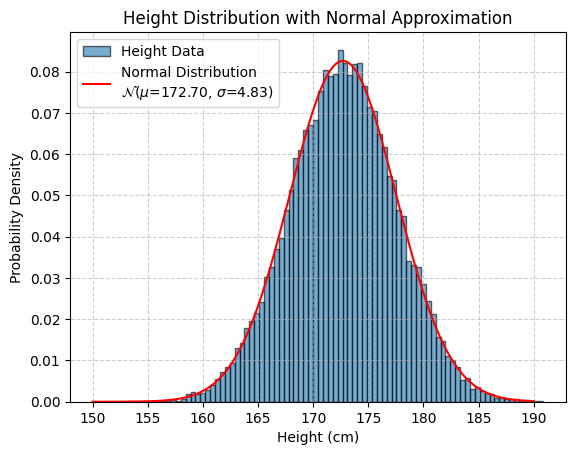

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt

# 현재 디렉토리에 있는 'height.txt' 파일 경로를 생성
path = os.path.join('./height.txt')

# height.txt 파일에서 데이터를 불러와 배열로 저장
xs = np.loadtxt(path)

#####################################################################
#                           매개변수 추정                           #
#####################################################################
# 데이터의 평균(mu) 및 표준편차(sigma) 계산
mu = np.mean(xs)  # 평균 계산
sigma = np.std(xs)  # 표준편차 계산

# x축 값 생성: 키 범위를 150cm ~ 190cm로 설정하여 1000개의 값 생성
x = np.linspace(150, 190, 1000)

# 정규 분포 PDF 값 계산 (이론적인 분포)
y = normal(x, mu, sigma)

#####################################################################
#                             결과 시각화                           #
#####################################################################
# 히스토그램 및 정규 분포 그래프 시각화
plt.hist(xs, bins='auto', density=True, edgecolor='k', alpha=0.6, label="Height Data")  
# 히스토그램을 자동 bin 개수로 설정하고 정규화하여 확률 밀도 형태로 출력

plt.plot(x, y, 'r-', label="Normal Distribution\n$\\mathcal{N}$" +  f"($\\mu$={mu:.2f}, $\\sigma$={sigma:.2f})")  # 정규 분포 PDF 곡선 추가

# 그래프 설정
plt.xlabel('Height (cm)')  # x축 라벨: 키(cm)
plt.ylabel('Probability Density')  # y축 라벨: 확률 밀도
plt.grid(True, linestyle="--", alpha=0.6)  # 격자 추가 (가독성 향상)
plt.legend()  # 범례 추가
plt.title("Height Distribution with Normal Approximation")  # 그래프 제목

plt.show()  # 그래프 출력


- 지금까지 최대 가능도 추정 (MLE) 를 통해 `매개변수를 추정`
- `매개변수를 추정하는 것`을 
  - `학습 (learning)` 이라고도 함

> 학습된 생성 모델을 이용해 무엇을 할 수 있을까 ?

### 2.4.1. 새로운 데이터 생성

- 매개변수가 추정된 모델을 활용해 모집단의 분포를 따르는 새로운 데이터 생성

In [ ]:
print(f'Estimated avg = {mu:.4f}')
print(f'Estimated std = {sigma:.4f}')

- 새로운 데이터 생성

In [62]:
data = np.random.normal(mu, sigma)

print(f'Generated data = {data:.4f}')

Generated data = 167.2433


- 대량의 데이터를 생성하여 분포 확인
  - 두 분포가 거의 일치

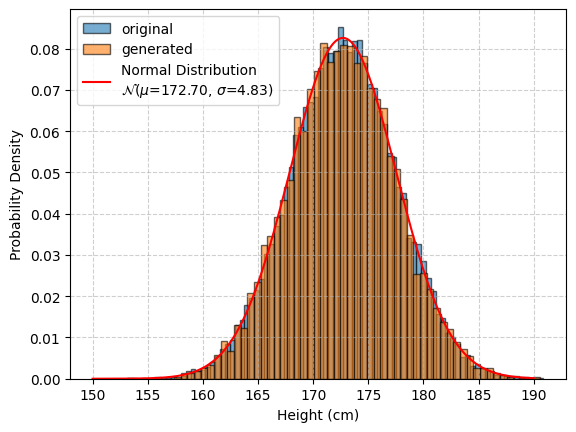

In [63]:
import os
import numpy as np
import matplotlib.pyplot as plt

# 현재 파일이 위치한 디렉토리에서 'height.txt' 파일의 경로를 생성
path = os.path.join('./height.txt')

# height.txt 파일에서 데이터를 불러와 배열로 저장
xs = np.loadtxt(path)  # 파일에서 데이터를 읽어옴

# 데이터의 평균(mu) 및 표준편차(sigma) 계산
mu = np.mean(xs)   # 평균 계산
sigma = np.std(xs)  # 표준편차 계산

# x축 값 생성: 키 범위를 150cm ~ 190cm로 설정하여 1000개의 값 생성
x = np.linspace(150, 190, 1000)

# 정규 분포 PDF 값 계산 (이론적인 분포)
y = normal(x, mu, sigma)

# 평균(mu)과 표준편차(sigma)를 기반으로 정규 분포에서 샘플 10,000개 생성
samples = np.random.normal(mu, sigma, 10000)

# 원본 데이터 (height.txt에서 불러온 데이터)의 히스토그램 그리기
plt.hist(xs, bins='auto', density=True, edgecolor='k', alpha=0.6, label='original')  
# 'bins=auto'는 최적의 bin 개수를 자동으로 설정하고, 확률 밀도로 정규화(density=True)  
# alpha=0.7로 반투명 효과를 적용하여 겹치는 부분이 보이도록 함

# 생성된 가우시안(정규 분포) 샘플의 히스토그램 그리기
plt.hist(samples, bins='auto', density=True, edgecolor='k', alpha=0.6, label='generated')  
# 위와 동일한 설정으로 생성된 정규 분포 샘플을 시각화

plt.plot(x, y, 'r-', label="Normal Distribution\n$\\mathcal{N}$" +  f"($\\mu$={mu:.2f}, $\\sigma$={sigma:.2f})")  # 정규 분포 PDF 곡선 추가


# 그래프 설정
plt.xlabel('Height (cm)')  # x축 라벨: 키(cm)
plt.ylabel('Probability Density')  # y축 라벨: 확률 밀도
plt.grid(True, linestyle="--", alpha=0.6)  # 격자 추가 (가독성 향상)
plt.legend()  # 범례 추가 (original: 원본 데이터, generated: 생성된 데이터)
plt.show()  # 그래프 출력


- 즉, `샘플로 부터 추정된 매개변수를 이용하는 생성 모델은 관측 데이터와 유사한 특징을 갖는 데이터를 잘 생성`함을 의미
- 다차원 데이터에 대해서도 유사한 방식을 통해 생성 모델을 추정하고 새로운 데이터를 생성할 수 있음
  - 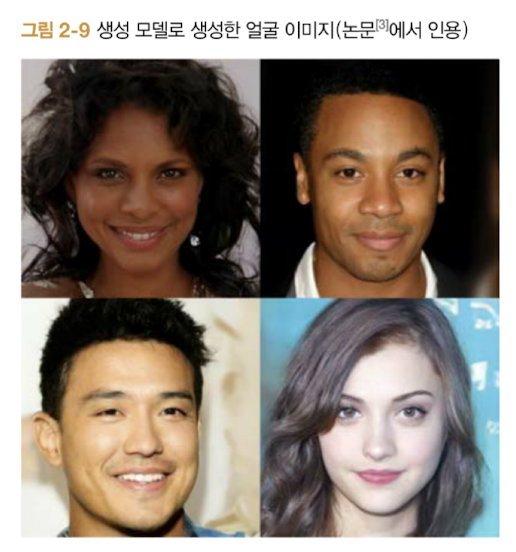

### 2.4.2. 확률 계산
- 주어진 관측 데이터가 확률 분포에서 얼마나 발생하기 어려운지를 확인하는 방법
- 확률을 계산하는 방식
  1. 확률 밀도 함수 $p(x)$ 에 대한 적분을 통해 해석적 계산
  2. 해석적 계산이 어려운 경우, 몬테카를로 방법을 통해 근사적 계산
    - 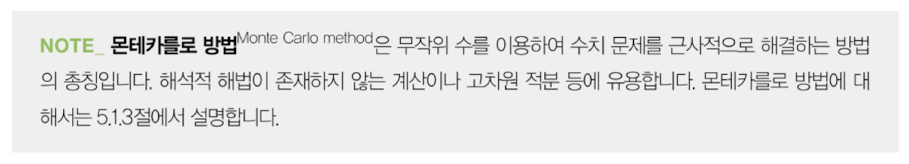

- 정규 분포에 대한 확률 밀도 함수를 적분을 통해 누적 분포 함수 (cumulative distribution function; cdf) 구하기
  - $\mathcal{N}(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma}\exp \left( -\frac{(x - \mu)^2}{2\sigma^2} \right)$
  - 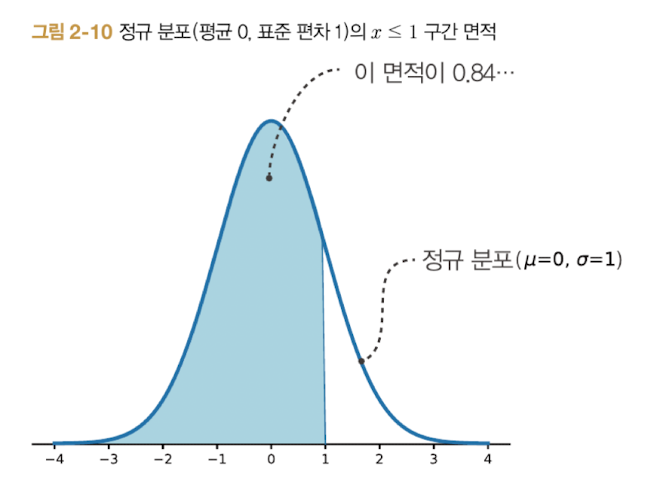

In [64]:
from scipy.stats import norm  # 정규 분포 관련 함수 제공 라이브러리

# 특정 값 x 설정
x = 1.0  # x 값 (확률을 구할 기준 값)

# 정규 분포의 누적 분포 함수 (CDF) 계산
# 평균 (loc=0), 표준 편차 (scale=1)인 표준 정규 분포에서 P(X ≤ x)를 계산
p = norm.cdf(x, loc=0, scale=1)

# 결과 출력 (x 이하의 확률)
print(f"P(X ≤ {x:.2f}) = {p:.4f}")


P(X ≤ 1.00) = 0.8413


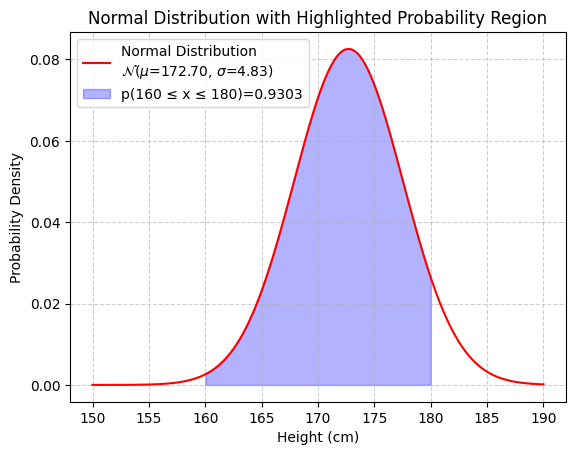

In [65]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm  # 정규 분포 관련 함수 제공

# 현재 파일이 위치한 디렉토리에서 'height.txt' 파일의 경로를 생성
path = os.path.join('./height.txt')

# height.txt 파일에서 데이터를 불러와 배열로 저장
xs = np.loadtxt(path)  # 파일에서 데이터를 읽어옴

# 데이터의 평균(mu) 및 표준편차(sigma) 계산
mu = np.mean(xs)   # 평균 계산
sigma = np.std(xs)  # 표준편차 계산

# x축 값 생성: 키 범위를 150cm ~ 190cm로 설정하여 1000개의 값 생성
x = np.linspace(150, 190, 1000)

# 정규 분포 PDF 값 계산 (이론적인 분포)
def normal(x, mu, sigma):
    """정규 분포 확률 밀도 함수 (PDF)"""
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

y = normal(x, mu, sigma)

# 정규 분포 곡선 그리기
plt.plot(x, y, 'r-', label="Normal Distribution\n$\\mathcal{N}$" + f"($\\mu$={mu:.2f}, $\\sigma$={sigma:.2f})")  # 정규 분포 PDF 곡선 추가

# 특정 구간 (160 ≤ x ≤ 180)만 색칠
x_start = 160  # 색칠할 구간의 시작점
x_end = 180  # 색칠할 구간의 끝점

x_fill = np.linspace(x_start, x_end, 500)  # 색칠할 x 값 범위
y_fill = normal(x_fill, mu, sigma)  # 해당 구간의 y 값

# 해당 구간의 누적 확률 (P(160 ≤ X ≤ 180)) 계산
p1 = norm.cdf(x_start, mu, sigma)  # P(X ≤ 160)
p2 = norm.cdf(x_end, mu, sigma)  # P(X ≤ 180)
prob = p2 - p1  # P(160 ≤ X ≤ 180)

# 선택한 구간 색칠 (파란색, 투명도 0.3 적용)
plt.fill_between(x_fill, y_fill, color='blue', alpha=0.3, label=f"p({x_start} ≤ x ≤ {x_end})={prob:.4f}")

# 그래프 설정
plt.xlabel('Height (cm)')  # x축 라벨: 키(cm)
plt.ylabel('Probability Density')  # y축 라벨: 확률 밀도
plt.grid(True, linestyle="--", alpha=0.6)  # 격자 추가 (가독성 향상)
plt.legend()  # 범례 추가 (정규 분포 및 특정 구간 확률)
plt.title("Normal Distribution with Highlighted Probability Region")  # 그래프 제목 추가

plt.show()  # 그래프 출력
